用窗函数法设计一个$h(n)$偶对称的线性相位FIR带阻滤波器，给定阻带下截止频率$f_{st_1}=40Hz$，阻带上截止频率$f_{st_2}=60Hz$，下通带截止频率为$f_{p_1}=15Hz$，上通带截止频率为$f_{p_2}=80Hz$，阻带最小衰减为$A_s=50dB$，抽样频率为$f_s=250Hz$。
理想带阻滤波器的频率响应和单位抽样响应分别为
$$H_d(e^{j\omega)}=\begin{cases}
e^{-j\omega\pi} & 0\leq|\omega|\leq\omega_1,\omega_2\leq|\omega|\leq\pi\\
0 & \omega_1\leq|\omega|\leq\omega_2
\end{cases}$$

$$
h_d(n)=\frac{1}{2\pi}\int ^{-\omega_2}_{-\pi} e^{-j\omega\tau}e^{j\omega n} {\rm d}\omega+\frac{1}{2\pi}\int ^{-\omega_1}_{-\omega_1} e^{-j\omega\tau}e^{j\omega n} {\rm d}\omega+\frac{1}{2\pi}\int ^{\pi}_{-\omega_2} e^{-j\omega\tau}e^{j\omega n} {\rm d}\omega\\=\begin{cases}
\frac{sin[\pi(n-\tau)]-sin[{\omega_2}(n-\tau)]+sin[{\omega_1}(n-\tau)]}{\pi(n-\tau)} & n\neq\tau\\
1-(\omega_2-\omega_1)/\pi & n=\tau(\tau为整数时)
\end{cases}$$
为满足线性相位,$\tau=(N-1)/2$程序如下:

In [1]:
#导入使用的库
import numpy as np;from math import *
from scipy import signal,fft
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


d:\code\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\code\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\code\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#滤波器参数
fs = 250; #抽样频率
wp1 = 2*pi*15/fs;wp2 = 2*pi*80/fs #通带截止频率
ws1 = 2*pi*40/fs;ws2 = 2*pi*60/fs #阻带截止频率
w1 = (wp1+ws1)/2;w2 = (wp2+ws2)/2 
Bt = np.array([np.abs(wp1-ws1),np.abs(wp2-ws2)]);Bt = Bt.min() #过渡带宽



In [3]:
#由阻带衰减As = 50，可以确定窗形状为海明窗
N = np.ceil((6.6*pi)/Bt)+1;N = int(N+(N+1)%2)#滤波器长度点数（取奇数）
wn = signal.windows.hamming(N) #汉宁窗的wn值

In [4]:
#理想低通滤波器的单位采样响应
t = int((N-1)/2)
n1 = np.arange(N);n1 = np.delete(n1,t)
hd = (np.sin(pi*(n1-t))-np.sin(w2*(n1-t))+np.sin(w1*(n1-t)))/(pi*(n1-t))
hd = np.insert(hd,t,(1-((w2-w1)/pi)))

In [5]:
#线性相位FIR滤波器
h = hd*wn;N0 = N*1000
He = np.abs(fft.fft(h,N0));He = He/np.max(He)
Ar = 20*np.log10(He);N1 = int(N0/2);f = np.linspace(0,1,N1)


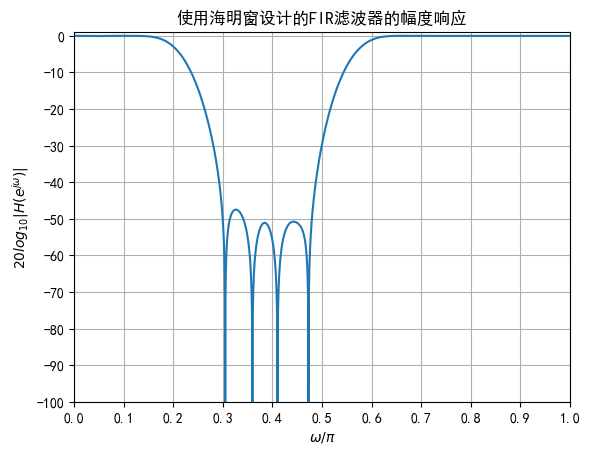

In [6]:
#绘制滤波器的幅度响应
fig,ax = plt.subplots();ax.plot(f,Ar[:N1]);ax.grid()
ax.set_title('使用海明窗设计的FIR滤波器的幅度响应');ax.set_xlabel('k')
ax.set_xlabel(r'$ \omega / \pi $')
ax.set_ylabel(r'$ 20log_{10}| H (e^{j \omega}) | $')
ax.set_xlim([0,1]);ax.set_ylim([-100,1])
ax.xaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_major_locator(MaxNLocator(11))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
plt.show()
fig.savefig('./fir_window4.png',dpi=500)